In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data_Science_Salary_Clean.csv')
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,max_salary,avg_salary,Company_Text,Job_State,Same_location,Age_Company,Python,R Studio,Excel,AWS
0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,...,181,146.0,Hopper\n,NY,0,14,0,0,0,0
1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,...,181,146.0,Noom US\n,NY,1,13,1,0,1,0
2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,...,181,146.0,Decode_M,NY,1,-1,1,0,1,0
3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,...,181,146.0,Sapphire Digital\n,NJ,1,2,1,0,1,0
4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,...,181,146.0,United Entertainment Group\n,NY,1,14,1,0,1,0


In [2]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'Hourly', 'min_salary', 'max_salary', 'avg_salary',
       'Company_Text', 'Job_State', 'Same_location', 'Age_Company', 'Python',
       'R Studio', 'Excel', 'AWS'],
      dtype='object')

In [3]:
df['Job Title'].unique()

array(['Senior Data Scientist', 'Data Scientist, Product Analytics',
       'Data Science Manager', ..., 'Cyber Security Data Engineer',
       'Security Analytics Data Engineer',
       'Patient Safety Physician or Safety Scientist - UK, Europe or the US'],
      dtype=object)

#### Fix Job Title And Seniority

In [2]:

def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
    
    
    
def seniority(title):
    if 'sr' in title.lower()  or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower():
        return 'senior'
    elif 'jr' in title.lower():
        return 'jr'
    else:
        return 'na'

In [3]:
df['Job Simp'] = df['Job Title'].apply(title_simplifier)
df['Job Simp'].value_counts()

na                1045
data scientist     984
analyst            880
data engineer      742
mle                140
manager             82
director            36
Name: Job Simp, dtype: int64

In [4]:
df['seniority'] = df['Job Title'].apply(seniority)
df['seniority'].value_counts()

na        3100
senior     799
jr          10
Name: seniority, dtype: int64

### fix Job_State United Kingdom as UK

In [5]:
df['Job_State'].value_counts()

 TX                1253
 CA                1069
 IL                 363
 PA                 324
 NY                 313
 AZ                 295
 OH                 177
 FL                  69
 NJ                  32
 DE                  10
 United Kingdom       4
Name: Job_State, dtype: int64

In [6]:
df['Job State'] = df['Job_State'].apply(lambda x: ' UK' if 'United Kingdom' in x else x)
df['Job State'].value_counts()
# df.head()

 TX    1253
 CA    1069
 IL     363
 PA     324
 NY     313
 AZ     295
 OH     177
 FL      69
 NJ      32
 DE      10
 UK       4
Name: Job State, dtype: int64

In [7]:
df.drop(['Job_State'], inplace = True, axis = 1)
df.columns
# df.head()

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'Hourly', 'min_salary', 'max_salary', 'avg_salary',
       'Company_Text', 'Same_location', 'Age_Company', 'Python', 'R Studio',
       'Excel', 'AWS', 'Job Simp', 'seniority', 'Job State'],
      dtype='object')

### Job description length
##### bcz it reflects on salary with more Job Description more salary  

In [8]:
df['Job_Descr_len'] = df['Job Description'].apply(lambda x : len(x))
df['Job_Descr_len']

0       3417
1       2350
2       3157
3       2619
4       2755
        ... 
3904    2054
3905    1479
3906    4640
3907    3541
3908    2899
Name: Job_Descr_len, Length: 3909, dtype: int64

### No. of Competitors 

In [9]:
df['Competitor_counts'] = df['Competitors'].apply(lambda x : len(x.split(',')) if x != '-1' else 0)
df['Competitor_counts']

0       0
1       0
2       0
3       2
4       3
       ..
3904    0
3905    0
3906    0
3907    0
3908    1
Name: Competitor_counts, Length: 3909, dtype: int64

In [12]:
df['Competitors']

0                             -1
1                             -1
2                             -1
3           Zocdoc, Healthgrades
4       BBDO, Grey Group, Droga5
                  ...           
3904                          -1
3905                          -1
3906                          -1
3907                          -1
3908                      AbbVie
Name: Competitors, Length: 3909, dtype: object

### Hourly wages into annual

In [10]:
df['min_salary'] = df.apply(lambda x : x.min_salary*2 if x.Hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x : x.max_salary*2 if x.Hourly == 1 else x.max_salary, axis = 1)
df[df.Hourly == 1][['Hourly','min_salary','max_salary']]

,Hourly,min_salary,max_salary
685,1,68,106
686,1,68,106
687,1,68,106
688,1,68,106
689,1,68,106
690,1,68,106
691,1,68,106
1295,1,20,52
1296,1,20,52
1297,1,20,52


#### Remove new line char '\n' from company_text

In [14]:
df.Company_Text

0                                 Hopper\n
1                                Noom US\n
2                                 Decode_M
3                       Sapphire Digital\n
4             United Entertainment Group\n
                       ...                
3904                Tachyon Technologies\n
3905    Staffigo Technical Services, LLC\n
3906                      PDS Tech, Inc.\n
3907          Data Resource Technologies\n
3908                                 UCB\n
Name: Company_Text, Length: 3909, dtype: object

In [11]:
df['Company_Text'] = df.Company_Text.apply(lambda x:x.replace('\n','')) 
df['Company_Text']

0                                 Hopper
1                                Noom US
2                               Decode_M
3                       Sapphire Digital
4             United Entertainment Group
                      ...               
3904                Tachyon Technologies
3905    Staffigo Technical Services, LLC
3906                      PDS Tech, Inc.
3907          Data Resource Technologies
3908                                 UCB
Name: Company_Text, Length: 3909, dtype: object

In [15]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'Hourly', 'min_salary', 'max_salary', 'avg_salary',
       'Company_Text', 'Same_location', 'Age_Company', 'Python', 'R Studio',
       'Excel', 'AWS', 'Job Simp', 'seniority', 'Job State', 'Job_Descr_len',
       'Competitor_counts'],
      dtype='object')

<AxesSubplot:>

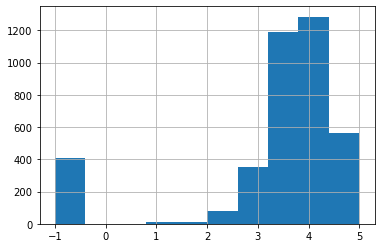

In [16]:
df.Rating.hist()

<AxesSubplot:>

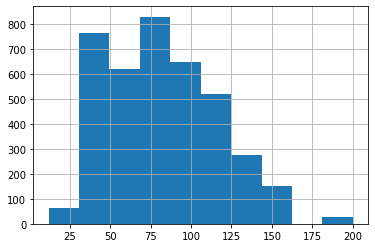

In [19]:
df.min_salary.hist()

<AxesSubplot:>

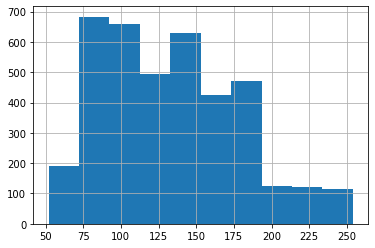

In [20]:
df.max_salary.hist()

<AxesSubplot:>

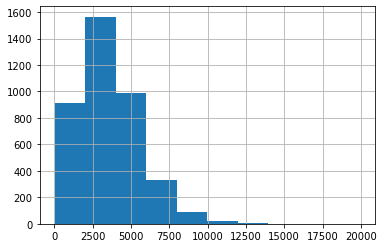

In [21]:
df.Job_Descr_len.hist()

<AxesSubplot:>

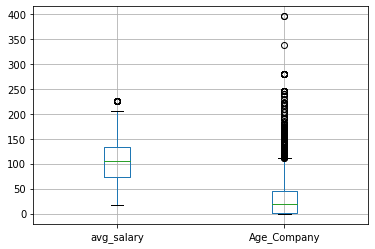

In [29]:
df.boxplot(['avg_salary','Age_Company'])

<AxesSubplot:>

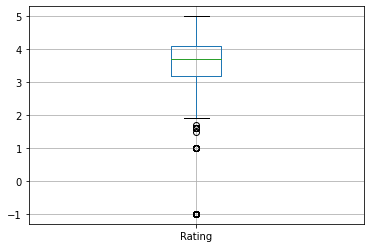

In [28]:
df.boxplot('Rating')

In [17]:
df[['avg_salary','Age_Company','Rating','Job_Descr_len']].corr()

,avg_salary,Age_Company,Rating,Job_Descr_len
avg_salary,1.000000,-0.026463,0.057115,-0.004968
Age_Company,-0.026463,1.000000,0.206365,0.388720
Rating,0.057115,0.206365,1.000000,0.078829
Job_Descr_len,-0.004968,0.388720,0.078829,1.000000


<AxesSubplot:>

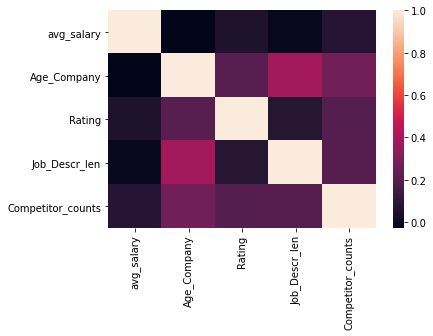

In [34]:
sns.heatmap(df[['avg_salary','Age_Company','Rating','Job_Descr_len','Competitor_counts']].corr())

In [18]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'Hourly', 'min_salary', 'max_salary', 'avg_salary',
       'Company_Text', 'Same_location', 'Age_Company', 'Python', 'R Studio',
       'Excel', 'AWS', 'Job Simp', 'seniority', 'Job State', 'Job_Descr_len',
       'Competitor_counts'],
      dtype='object')

In [12]:
## Let Explore Categorical Data

df_cat = df[['Location', 'Headquarters','Size','Type of ownership', 'Industry', 'Sector', 'Job State','Revenue','Python', 'R Studio',
       'Excel', 'AWS','Company_Text', 'Job Simp', 'seniority']]


Graph for Location and total 191


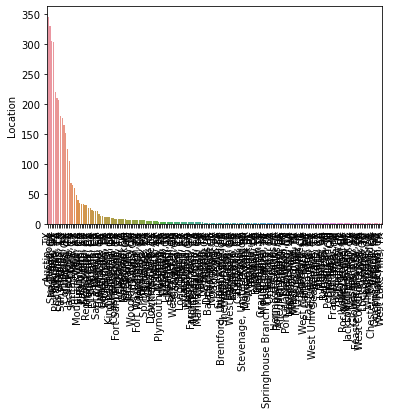

Graph for Headquarters and total 543


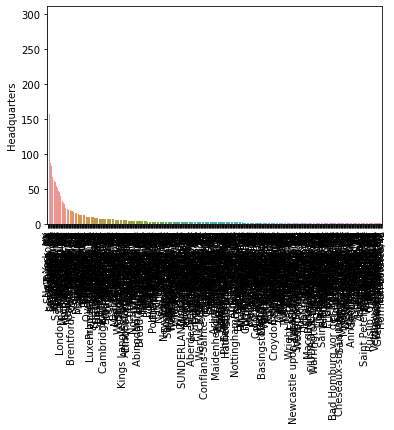

Graph for Size and total 9


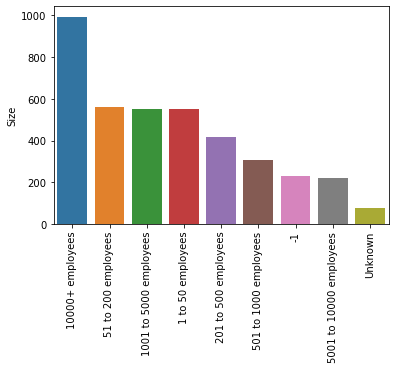

Graph for Type of ownership and total 15


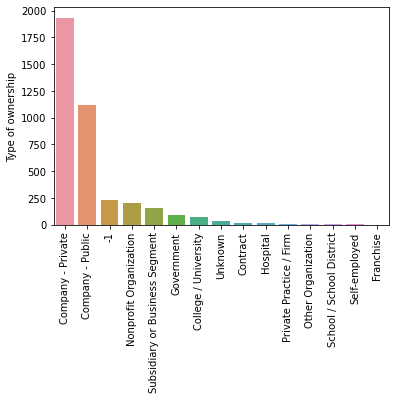

Graph for Industry and total 96


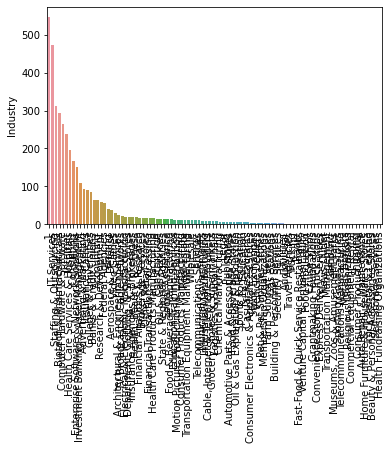

Graph for Sector and total 26


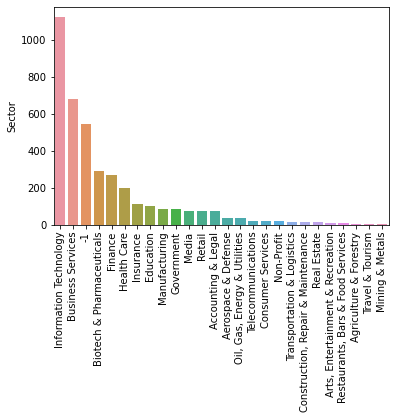

Graph for Job State and total 11


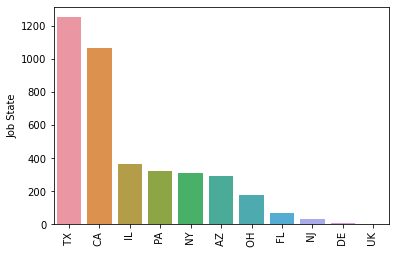

Graph for Revenue and total 14


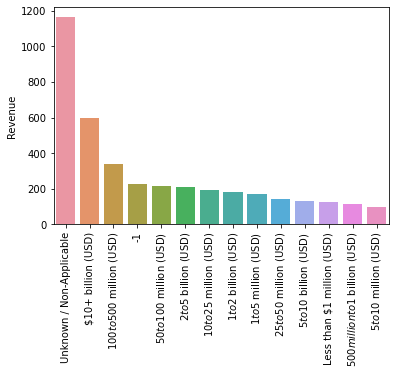

Graph for Python and total 2


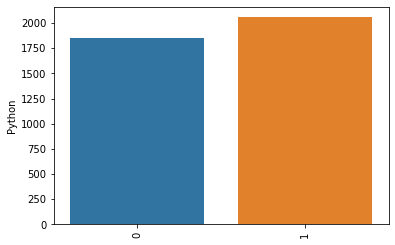

Graph for R Studio and total 2


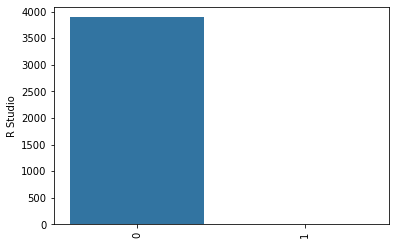

Graph for Excel and total 2


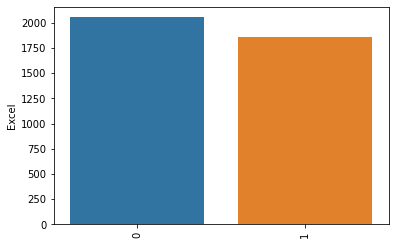

Graph for AWS and total 2


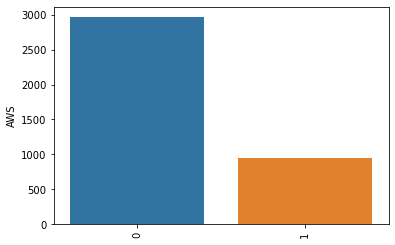

Graph for Job Simp and total 7


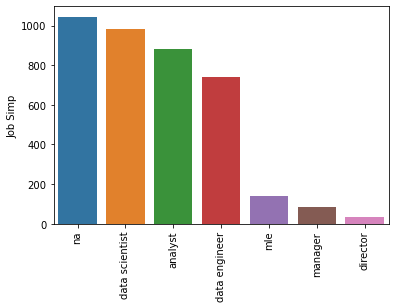

Graph for seniority and total 3


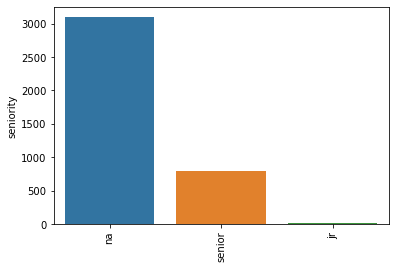

In [50]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print(f'Graph for {i} and total {len(cat_num)}')
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

Graph for Location and total 20


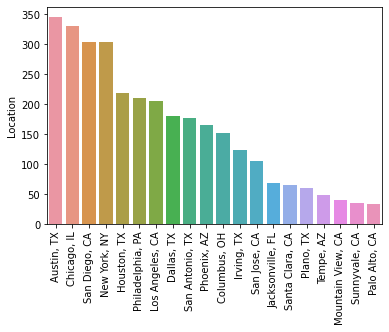

Graph for Headquarters and total 20


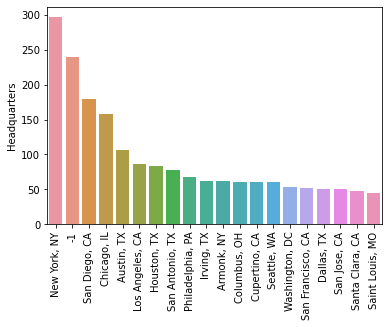

Graph for Company_Text and total 20


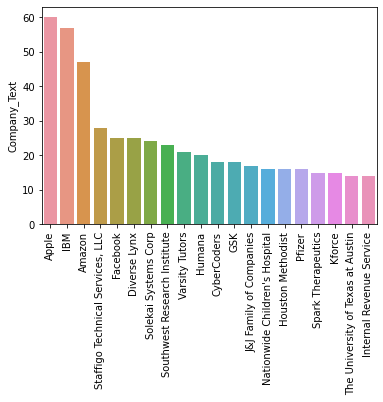

In [56]:
for i in df_cat[['Location', 'Headquarters','Company_Text']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print(f'Graph for {i} and total {len(cat_num)}')
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

In [13]:
pd.pivot_table(df,index = ['Job Simp', 'seniority'], values = 'avg_salary')

avg_salary
Job Simp       seniority            
analyst        jr          80.500000
               na         101.767808
               senior      97.347973
data engineer  jr          92.700000
               na         100.455631
               senior     103.354305
data scientist jr         128.000000
               na         123.600694
               senior     126.994297
director       na          97.140625
               senior     118.125000
manager        na         109.239726
               senior     112.444444
mle            na         124.310924
               senior     102.595238
na             jr         102.500000
               na         100.473810
               senior     104.536946

In [61]:
pd.pivot_table(df,index = 'Job State', values = 'avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
Job State,
NY,135.677316
DE,133.550000
CA,132.782975
NJ,118.687500
UK,99.625000
AZ,97.349153
TX,95.347167
PA,94.675926
OH,94.093220


In [23]:
pd.pivot_table(df,index = ['Job State','Job Simp'], values = 'avg_salary', aggfunc = 'count').sort_values('Job State', ascending=False)

avg_salary
Job State Job Simp                  
 UK       na                       2
          data scientist           1
          analyst                  1
 TX       na                     316
          mle                     40
          manager                 26
          director                10
          data scientist         213
          data engineer          317
          analyst                331
 PA       director                 9
          analyst                 66
          data scientist          52
          data engineer           51
          manager                  4
          mle                      5
          na                     137
 OH       manager                  3
          data engineer           39
          data scientist          40
          analyst                 27
          mle                      6
          na                      62
 NY       na                      32
          mle                     12
          manager                  4
          director                 2
          data scientist         202
          data engineer           17
          analyst                 44
 NJ       mle                      1
          na                       3
          data scientist          18
          data engineer            2
          analyst                  8
 IL       director                 3
          analyst                 95
          data scientist          99
          data engineer           70
          manager                  9
          mle                     11
          na                      76
 FL       na                      25
          manager                  2
          director                 1
          data scientist           6
          analyst                 23
          data engineer           12
 DE       data scientist           5
          data engineer            3
          na                       2
 CA       na                     330
          mle                     60
          manager                 25
          director                 9
          data scientist         302
          data engineer          134
          analyst                209
 AZ       manager                  9
          data scientist          46
          director                 2
          data engineer           97
          mle                      5
          na                      60
          analyst                 76

In [21]:
# This cmmd is use to show whole rows which is look in a top.
pd.set_option('display.max_rows', None)  

In [30]:
# Avg salary of Data Scientist in different State

pd.pivot_table(df[df['Job Simp'] == 'data scientist'],index = 'Job State', values = 'avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
Job State,
CA,148.158940
NY,135.601485
DE,135.400000
NJ,130.527778
OH,120.787500
AZ,115.478261
TX,108.070423
PA,93.067308
IL,89.116162


In [32]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'Hourly', 'min_salary', 'max_salary', 'avg_salary',
       'Company_Text', 'Same_location', 'Age_Company', 'Python', 'R Studio',
       'Excel', 'AWS', 'Job Simp', 'seniority', 'Job State', 'Job_Descr_len',
       'Competitor_counts'],
      dtype='object')

#### Compare Lot of features with Avg Salary

In [43]:
df_pivots = df[['Rating','Competitor_counts','Type of ownership','Industry', 'Sector', 'Revenue','Hourly', 'Python', 'R Studio',
       'Excel', 'AWS','avg_salary']]

In [44]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
 2.1    152.333333
 1.5    124.000000
 2.3    123.750000
 4.5    122.856481
 4.4    122.519737
 4.8    121.250000
 4.1    119.080882
 2.0    116.875000
 2.4    113.250000
 1.0    112.850000
 3.1    110.769912
 3.9    110.230132
 3.8    110.140756
 4.7    110.033898
 4.2    109.496753
 5.0    109.328125
 3.6    109.083333
 4.6    108.601351
 4.0    106.917500
 3.5    106.772727
 2.8    105.258621
 3.0    104.592308
 3.3    104.357143
-1.0    104.342298
 2.7    104.275862
 4.9    103.322222
 3.4    103.270270
 4.3    102.752101
 2.9    102.325397
 3.7    101.431034
 1.9    101.333333
 3.2    100.176471
 1.6     99.000000
 2.5     87.787879
 2.6     85.870370
 2.2     79.944444
 1.7     73.000000
Competitor_counts
                   avg_salary
Competitor_counts            
1                  115.579710
3                  113.036105
2                  106.743976
0                  106.030978
Type of ownership
                                avg_

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [50]:
## Company's whose Revenue is higher are more focus on python or not ..

pd.pivot_table(df_pivots, index = 'Revenue', columns = 'Python', values = 'avg_salary', aggfunc = 'count' ).sort_values('Revenue')

Python,0,1
Revenue,,
$1 to $2 billion (USD),100,80
$1 to $5 million (USD),83,87
$10 to $25 million (USD),96,95
$10+ billion (USD),221,378
$100 to $500 million (USD),156,182
$2 to $5 billion (USD),135,76
$25 to $50 million (USD),57,86
$5 to $10 billion (USD),60,73
$5 to $10 million (USD),54,46


In [19]:
df.to_csv('EDA_Data.csv')

## Word Cloud For Job Description 

In [64]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [14]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

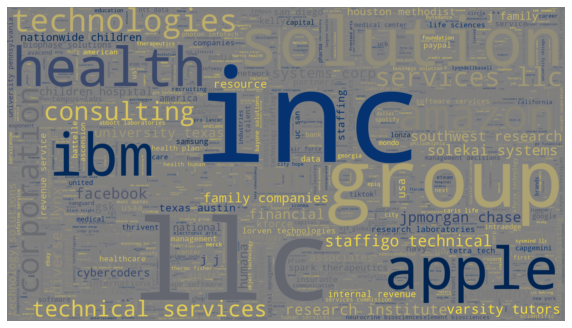

In [20]:
words = " ".join(df['Company_Text'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="grey", colormap = 'cividis', random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1920, height = 1080)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
# wc.to_file('Data_Science.png')
plt.show()
